In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle

In [3]:
import pandas as pd

In [4]:
import os

In [5]:
metaData = pd.read_excel('../data/TranslationsV3.1.xlsx')

In [6]:
def dutchToEnglish(row):
    return row['Org. Lang.']=='NL' and row['eng']>0


metaData['DutchToEnglish'] = metaData.apply(dutchToEnglish, axis=1)

In [7]:
def getFilePath(bookid):
    sandersPath = '../data/corpus.sanders.nerINL.2012-10-24/' + bookid + '.pkl'
    karinaPath = '../data/corpus.karina.nerINL.2012-10-26/' + bookid + '.pkl'
    if os.path.isfile(sandersPath):
        return sandersPath
    elif os.path.isfile(karinaPath):
        return karinaPath
    else:
        print 'not found!'
        return None

#for bookid in metaData['bookid']:
#    getFilePath(bookid)

In [8]:
def getSummaryStats(filename):
    data = pickle.load(open(filename,'r'))
    dataPerson = data[data['Type']=='person']
    dataLocation = data[data['Type']=='location']
    return (data['Interest-NL'].mean(),
        data['Interest-CA'].mean(),
        dataPerson['Interest-NL'].mean(),
        dataPerson['Interest-CA'].mean(),
        dataLocation['Interest-NL'].mean(),
        dataLocation['Interest-CA'].mean() )

In [9]:
dataRows = []

for index, row in metaData.iterrows():
    dataRow = [
        row['bookid'],
        row['auteur'],
        row['titel'],
        row['DutchToEnglish']
    ]
    filename = getFilePath(row['bookid'])
    dataRow = dataRow + list(getSummaryStats(filename))
    dataRows.append(dataRow)

dataSummary = pd.DataFrame(dataRows, columns=['bookid','auteur','titel', 'DutchToEnglish',                       
            'Interest-NL','Interest-CA',
            'Interest-NL-Person','Interest-CA-Person',
            'Interest-NL-Location','Interest-CA-Location' ])


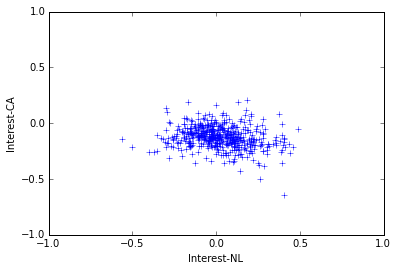

In [10]:
plot(dataSummary['Interest-NL'],dataSummary['Interest-CA'], '+')
axis([-1,1,-1,1])
xlabel('Interest-NL')
ylabel('Interest-CA')

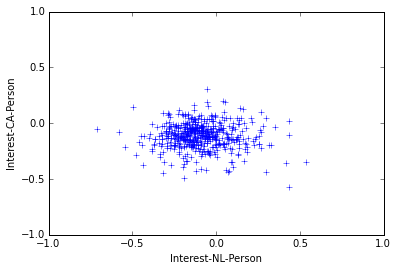

In [11]:
plot(dataSummary['Interest-NL-Person'],dataSummary['Interest-CA-Person'], '+')
axis([-1,1,-1,1])
xlabel('Interest-NL-Person')
ylabel('Interest-CA-Person')

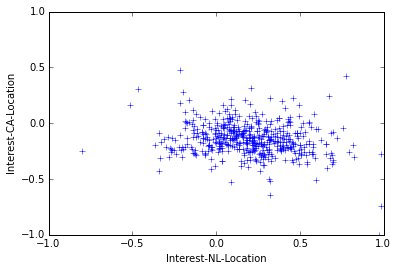

In [12]:
plot(dataSummary['Interest-NL-Location'],dataSummary['Interest-CA-Location'], '+')
axis([-1,1,-1,1])
xlabel('Interest-NL-Location')
ylabel('Interest-CA-Location')

In [13]:
dataSummaryTranslated = dataSummary[dataSummary['DutchToEnglish']]
dataSummaryNotTranslated = dataSummary[dataSummary['DutchToEnglish']==False]

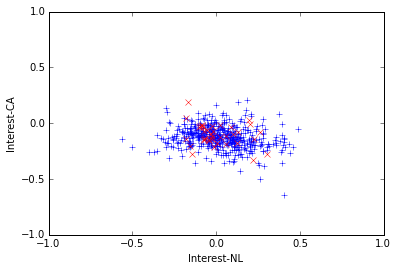

In [14]:
plot(dataSummaryNotTranslated['Interest-NL'],dataSummaryNotTranslated['Interest-CA'], '+')
plot(dataSummaryTranslated['Interest-NL'],dataSummaryTranslated['Interest-CA'], 'rx')
axis([-1,1,-1,1])
xlabel('Interest-NL')
ylabel('Interest-CA')

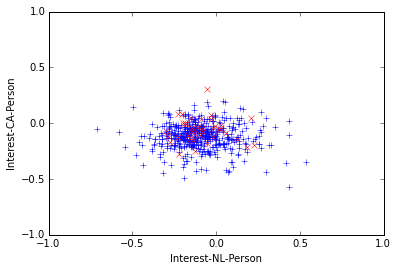

In [15]:
plot(dataSummaryNotTranslated['Interest-NL-Person'],dataSummaryNotTranslated['Interest-CA-Person'], '+')
plot(dataSummaryTranslated['Interest-NL-Person'],dataSummaryTranslated['Interest-CA-Person'], 'rx')
axis([-1,1,-1,1])
xlabel('Interest-NL-Person')
ylabel('Interest-CA-Person')

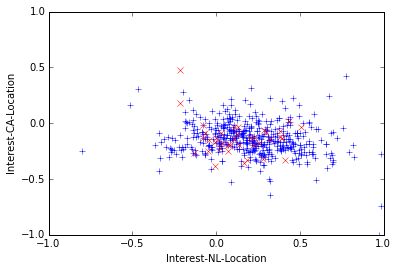

In [16]:
plot(dataSummaryNotTranslated['Interest-NL-Location'],dataSummaryNotTranslated['Interest-CA-Location'], '+')
plot(dataSummaryTranslated['Interest-NL-Location'],dataSummaryTranslated['Interest-CA-Location'], 'rx')
axis([-1,1,-1,1])
xlabel('Interest-NL-Location')
ylabel('Interest-CA-Location')

In [21]:
print 'NL Tot NoTr %2.4f'%std(dataSummaryNotTranslated['Interest-NL'])
print 'CA Tot NoTr %2.4f'%std(dataSummaryNotTranslated['Interest-CA'])

print 'NL Tot Tran %2.4f'%std(dataSummaryTranslated['Interest-NL'])
print 'CA Tot Tran %2.4f'%std(dataSummaryTranslated['Interest-CA'])

print 'NL Per NoTr %2.4f'%std(dataSummaryNotTranslated['Interest-NL-Person'])
print 'CA Per NoTr %2.4f'%var(dataSummaryNotTranslated['Interest-CA-Person'])

print 'NL Per Tran %2.4f'%std(dataSummaryTranslated['Interest-NL-Person'])
print 'CA Per Tran %2.4f'%std(dataSummaryTranslated['Interest-CA-Person'])

print 'NL Loc NoTr %2.4f'%std(dataSummaryNotTranslated['Interest-NL-Location'])
print 'CA Loc NoTr %2.4f'%std(dataSummaryNotTranslated['Interest-CA-Location'])

print 'NL Loc Tran %2.4f'%std(dataSummaryTranslated['Interest-NL-Location'])
print 'CA Loc Tran %2.4f'%std(dataSummaryTranslated['Interest-CA-Location'])


NL Tot NoTr 0.1675
CA Tot NoTr 0.0984
NL Tot Tran 0.1262
CA Tot Tran 0.0965
NL Per NoTr 0.1656
CA Per NoTr 0.0130
NL Per Tran 0.1297
CA Per Tran 0.1072
NL Loc NoTr 0.2531
CA Loc NoTr 0.1455
NL Loc Tran 0.1822
CA Loc Tran 0.1501
